# Dependências

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Configurações

In [20]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [21]:
voc = ["EU", "VOCÊ", "É", "SOU", "MUITO", "LEGAL", "DEMAIS", "INCRÍVEL"]

def encode(text):
  a_text = text.split(" ")
  r = []
  for i in a_text:
    if i in voc:
      r.append(voc.index(i))
  return np.array(r)


def decode(a_text):
  return voc[np.argmax(a_text)]

# Dataset

In [22]:
data = np.array([
    encode("EU SOU MUITO LEGAL"),
    encode("MUITO LEGAL EU SOU"),
    encode("EU SOU LEGAL DEMAIS"),
    encode("VOCÊ É MUITO LEGAL"),
    encode("VOCÊ É LEGAL DEMAIS")
    ])

targets = data[:,-1]
inputs = data[:,0:3]

print(f"Inputs: \n{inputs}")
print(f"Targets: \n{targets}")

Inputs: 
[[0 3 4]
 [4 5 0]
 [0 3 5]
 [1 2 4]
 [1 2 5]]
Targets: 
[5 3 6 5 6]


# Arquitetura

In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(3, 1), activation='tanh', return_sequences=True))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(len(voc), activation='softmax'))

# Compile o modelo
learning_rate = 0.1
#adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy')

# Imprime a arquitetura
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 100)            40800     
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 8)                 808       
                                                                 
Total params: 122008 (476.59 KB)
Trainable params: 122008 (476.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


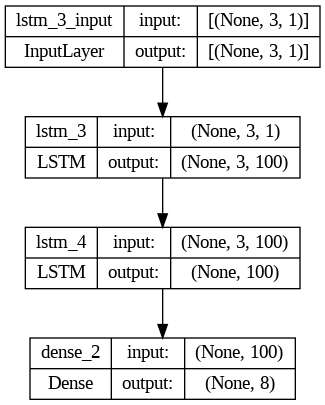

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Treinamento

In [25]:
# Hiperparâmetros
epochs = 1000

# Treine o modelo
log = model.fit(inputs, targets, epochs=epochs)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 2.0790
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.0275
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.9789
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.9329
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.8893
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.8479
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.8086
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7711
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.7353
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.7013
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.6688
Epoch 12/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.6379
Epoch 13/1000
1/1 [====================

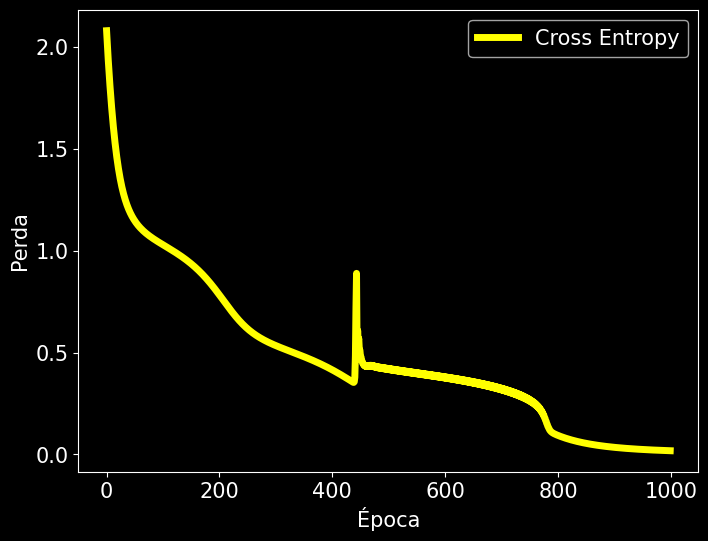

In [26]:
losses = log.history["loss"]
data_epochs = np.arange(0, epochs, 1)

plt.plot(data_epochs, losses, color="yellow", lw=5, label = 'Cross Entropy')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Teste

In [27]:
# Testa a previsão com uma nova sequência
#test_sequence = [1, 0, 1]

text = "EU SOU MUITO" #Valor conhecido
# text = "VOCÊ É INCRÍVEL" #valor desconhecido
# text = "SOU MUITO INCRÍVEL" #valor desconhecido meio provável
# text = "VOCÊ É EU" #valor desconhecido improvável
# text = "EU SOU É" #valor desconhecido improvável

test_sequence = encode(text)
predicted_output = model.predict(np.array([test_sequence]))

print(f"Vocabulário: {voc}")
print()
print(f"Frases conhecidas:\n")

for i in range(len(inputs)):
    s = ""
    for j in inputs[i]:
      s += voc[j] +" "
    print(f"{s}{decode(targets[i])}")

print()

print(f"Sequência de entrada: {test_sequence}")
print(f"Sequência prevista: {predicted_output}")
print()

print(f"Texto de entrada: {text} ...")
print(f"Texto de saída: {text} {decode(predicted_output)}. ({np.max(predicted_output)})")


1/1 [==============================] - 1s 1s/step
Vocabulário: ['EU', 'VOCÊ', 'É', 'SOU', 'MUITO', 'LEGAL', 'DEMAIS', 'INCRÍVEL']

Frases conhecidas:

EU SOU MUITO EU
MUITO LEGAL EU EU
EU SOU LEGAL EU
VOCÊ É MUITO EU
VOCÊ É LEGAL EU

Sequência de entrada: [0 3 4]
Sequência prevista: [[9.49828755e-05 5.83703331e-05 1.24441460e-04 1.07005086e-04
  1.40591554e-04 9.72915530e-01 2.64751893e-02 8.39516142e-05]]

Texto de entrada: EU SOU MUITO ...
Texto de saída: EU SOU MUITO LEGAL. (0.972915530204773)
